In [1]:
#Mount drive and load data
from google.colab import drive

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
train_path = "/content/drive/MyDrive/Sign Language/train"
valid_path = "/content/drive/MyDrive/Sign Language/valid"
test_path = "/content/drive/MyDrive/Sign Language/test"

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
            .flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
            .flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
            .flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [5]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [6]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [7]:
x = mobile.layers[-6].output
output = Dense(units=10, activation='softmax')(x)

In [9]:
model = tf.keras.Model(inputs=mobile.input, outputs=output)

In [10]:
for layer in model.layers[:-23]:
  layer.trainable = False

In [11]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=30, verbose=2)

Epoch 1/30
172/172 - 1090s - loss: 0.3446 - accuracy: 0.9200 - val_loss: 0.2417 - val_accuracy: 0.9267
Epoch 2/30
172/172 - 7s - loss: 0.1036 - accuracy: 0.9848 - val_loss: 0.0950 - val_accuracy: 0.9767
Epoch 3/30
172/172 - 7s - loss: 0.0550 - accuracy: 0.9942 - val_loss: 0.0551 - val_accuracy: 0.9900
Epoch 4/30
172/172 - 7s - loss: 0.0292 - accuracy: 0.9971 - val_loss: 0.0436 - val_accuracy: 0.9867
Epoch 5/30
172/172 - 7s - loss: 0.0202 - accuracy: 0.9988 - val_loss: 0.0399 - val_accuracy: 0.9967
Epoch 6/30
172/172 - 7s - loss: 0.0152 - accuracy: 0.9988 - val_loss: 0.0317 - val_accuracy: 0.9933
Epoch 7/30
172/172 - 7s - loss: 0.0165 - accuracy: 0.9982 - val_loss: 0.0320 - val_accuracy: 0.9933
Epoch 8/30
172/172 - 7s - loss: 0.0102 - accuracy: 0.9994 - val_loss: 0.0240 - val_accuracy: 0.9933
Epoch 9/30
172/172 - 7s - loss: 0.0125 - accuracy: 0.9982 - val_loss: 0.0443 - val_accuracy: 0.9867
Epoch 10/30
172/172 - 7s - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0249 - val_accuracy: 0.9

In [15]:
predictions = model.predict(x=test_batches, verbose=0)

In [16]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [17]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [18]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']

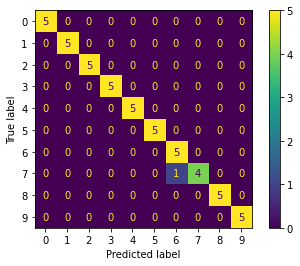

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_plot_labels)
disp = disp.plot()
plt.show()